In [ ]:
#removing correlated attributes script
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

df_out = trimm_correlated(BalanceSheets.corr(), 0.7)
df_out.corr()

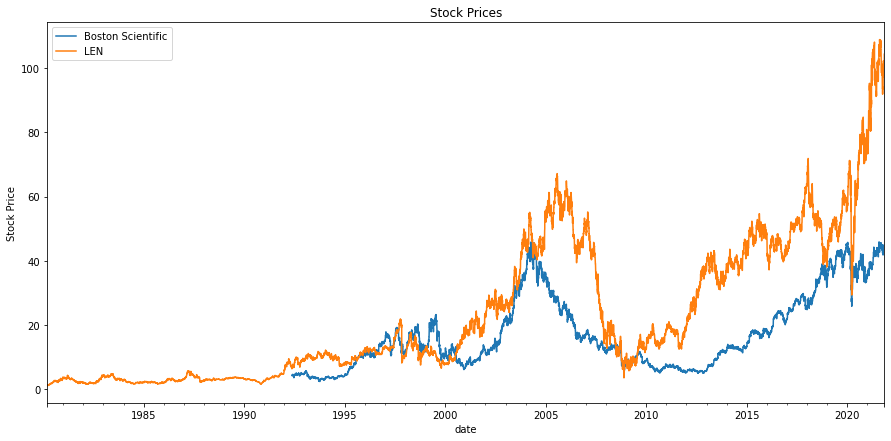

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Stock Price Check of Data
newStockPrices = pd.read_csv("newStockPrices.csv", index_col=["symbol","date"],parse_dates=["date"],dtype={'date':str,'Unnamed: 0':int,"symbol":str,"close":float})

newStockPrices.loc['BSX']['close'].plot(label='Boston Scientific', figsize=(15,7))
newStockPrices.loc['LEN']['close'].plot(label='LEN')

plt.ylabel('Stock Price')
plt.title('Stock Prices')
plt.legend()

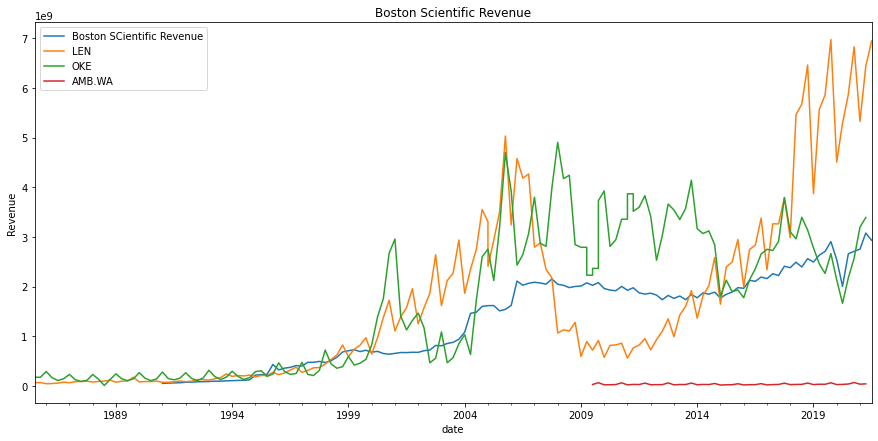

In [8]:
IncomeStatements = pd.read_csv("ConvertedIncomeStatements.csv",index_col=["symbol","date"],parse_dates=["date"],
   dtype={
        "reportedCurrency":str,
        "revenue":float,
        "costOfRevenue":float,
        "grossProfit":float,
        "grossProfitRatio":float,
        "researchAndDevelopmentExpenses":float,
        "generalAndAdministrativeExpenses":float,
        "sellingAndMarketingExpenses":float,
        "sellingGeneralAndAdministrativeExpenses":float,
        "otherExpenses":float,
        "operatingExpenses":float,
        "costAndExpenses":float,
        "interestExpense":float,
        "depreciationAndAmortization":float,
        "ebitda":float,
        "ebitdaratio":float,
        "operatingIncome":float,
        "operatingIncomeRatio":float,
        "totalOtherIncomeExpensesNet":float,
        "incomeBeforeTax":float,
        "incomeBeforeTaxRatio":float,
        "incomeTaxExpense":float,
        "netIncome":float,
        "netIncomeRatio":float,
        "eps":float,
        "epsdiluted":float,
        "weightedAverageShsOut":float,
        "weightedAverageShsOutDil":float,
   })

#Revenue Visualization
IncomeStatements.loc['BSX']['revenue'].plot(label='Boston SCientific Revenue', figsize=(15,7))
IncomeStatements.loc['LEN']['revenue'].plot(label="LEN")
IncomeStatements.loc['OKE']['revenue'].plot(label='OKE')
IncomeStatements.loc['AMB.WA']['revenue'].plot(label='AMB.WA')
plt.ylabel('Revenue')
plt.title('Bostson Scientific Revenue')
plt.legend()